# Countries with the best $Green$ $Economy$ $Index$ and the relationship between CO² emissions, agricultural land size, population density and exportation

## Table of Contents
<ul>
<li><a href="#intro">1. Introduction</a></li>
<li><a href="#wrangling">2. Data Wrangling</a></li>
<li><a href="#eda">3. Exploratory Data Analysis</a></li>
<li><a href="#conclusions">4. Conclusions</a></li>
</ul>

<a id='intro'></a>
## 1. Introduction

> Economic growth has been always the header of politicians speechs. Recently, its impact on natural resources has taken important part of leading economy meetings and also on the social media exposure.
> 
> The purpose of this data analysis is to identify countries on the globe that have being thriving combining economic growth with the least environmental impact.
>
> Based on the [CO² emissions - tonnes per person](https://cdiac.ess-dive.lbl.gov/) and the [Income per person - GDP/capita, PPP$ inflation-adjusted](http://gapm.io/dgdppc) datasets, I calculated the **Total Differency CO² Emissions Per Person** and the **Total Differency Income Per Person**, between 1958 and 2014, for 190 countries around the globe.
>
> CO² emissions represents the Carbon Dioxide emissions from the burning of fossil fuels (metric tonnes of CO² per person)
> 
> Income per person (PPP GDP) is gross domestic product converted to international dollars using purchasing power parity 
> rates. 
> An international dollar has the same purchasing power over GDP as the U.S. dollar has in the United States. 
> GDP at purchaser's prices is the sum of gross value added by all resident producers in the economy plus 
> any product taxes and minus any subsidies not included in the value of the products. 
> It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation 
> of natural resources.
>
> The outcomes were used to calculate the **Green Economy Index**, as explained below:

>$Green$ $Economy$ $Index$ $=$ $CO2$ green_score $+$ $GDP$ green_score

>The higher the result, the higher is the Green Economy Index, as explained below on the examples:
>
>**Green Economy Index = 8** = **Very low CO2 (4)** + **Very high GDP (4)** 
>
>**Green Economy Index = 6** = **Low CO2 (3)** + **High GDP (3)** 
>
>**Green Economy Index = 4** = **High CO2 (2)** + **Low GDP (2)** 
>
>**Green Economy Index = 2** = **Very high CO2 (1)** + **Very low GDP (1)** 

> Later, the [Agricultural land](https://data.worldbank.org/indicator/AG.LND.AGRI.ZS), [Population density](https://population.un.org/wpp/), and [Exports](https://data.worldbank.org/indicator/NE.EXP.GNFS.ZS) datasets were added to the analysis to verify their correlation with CO² emissions.

<a id='wrangling'></a>
## 2. Data Wrangling


### General Properties

**2.1.** Importing Python packages and data sources

In [717]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df_CO2 = pd.read_csv('co2_emissions_tonnes_per_person.csv')
df_GDP = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
df_agri = pd.read_csv('agricultural_land_percent_of_land_area.csv')
df_pop = pd.read_csv('population_density_per_square_km.csv')
df_expo = pd.read_csv('exports_percent_of_gdp.csv')

**2.2.** Checking the dataframes content and Null values

In [718]:
# Checking ´df_CO2´content
df_CO2.head(3)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0529,0.0637,0.0854,0.154,0.242,0.294,0.412,0.35,0.316,0.299
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.3800,1.2800,1.3000,1.460,1.480,1.560,1.790,1.68,1.730,1.960
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.2200,2.9900,3.1900,3.160,3.420,3.300,3.290,3.46,3.510,3.720


In [719]:
# Creating a 'df_CO2' dataframe to see the number of Null values on each column
df = df_CO2.isna().sum()
df.to_frame().transpose()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,0,187,187,185,187,186,187,187,186,187,...,2,2,1,1,1,1,1,0,0,0


In [720]:
# Checking ´df_GDP´content
df_GDP.head(3)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2420,2470,2520,2580,2640,2700,2760,2820,2880,2940
1,Albania,667,667,667,667,667,668,668,668,668,...,18500,18900,19300,19700,20200,20600,21100,21500,22000,22500
2,Algeria,715,716,717,718,719,720,721,722,723,...,15600,15900,16300,16700,17000,17400,17800,18200,18600,19000


In [721]:
# Creating a 'df_GDP' dataframe to see the number of Null values on each column
df = df_GDP.isna().sum()
df.to_frame().transpose()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As we can see, the `df_CO2` dataframe has too many Null values and data series starts from 1800 and ends on 2014, while `df_GDP`dataframe has no Nulls and starts from 1800 and ends on 2040, as it is a projection based on yer 2011. We will work on these Null values and cutting dataframes on the next section.

### Data Cleaning

**2.3.** Creating a function `columns_with_null_perc_under_25` to return a list of column labels that have Null values' percentage below 25%

In [722]:
def columns_with_null_perc_under_25(data_frame):
    a = round((data_frame.isnull().sum() * 100/ len(data_frame)),2)
    a = a.to_frame('null_percentage')
    a = a.query('null_percentage < 25.00').transpose().columns
    return a

> **Function's code explanation:**
>
> 1) Round the result of the sum of Null values divided by the number of rows in each column
>
> 2) Convert the Series data into Dataframe creating a label 'null_percentage' for the results found on 1
>
> 3) Query the null percentage values under 25%, transpose the 'year' values back to columns and list the column labels on the variable to be returned

**2.4.** Filtering the dataframes columns based on the list of column labels originated by the `columns_with_null_perc_under_25` and renaming the dataframes new versions.

In [723]:
# Filtering CO2 dataframe
df_CO2_v1 = df_CO2[columns_with_null_perc_under_25(df_CO2)]

In [724]:
# Filtering GDP dataframe, even though the dataframe has no Null values
df_GDP_v1 = df_GDP[columns_with_null_perc_under_25(df_GDP)]

In [725]:
# Filtering Agricultural dataframe
df_agri_v1 = df_agri[columns_with_null_perc_under_25(df_agri)]

In [726]:
# Filtering Population dataframe
df_pop_v1 = df_pop[columns_with_null_perc_under_25(df_pop)]

In [727]:
# Filtering Exportation dataframe
df_expo_v1 = df_expo[columns_with_null_perc_under_25(df_expo)]

**2.5.** As the result from the last code is a data series from 1958 to 2014, I also cut `df_GDP_v1` dataframe so we can have the exactly data series we have on `df_CO2_v1` dataframe

In [728]:
# Filtering columns 'country', on index 0, and the data range '1958' to '2014', on indexes 159 and 216, respectively.
df_GDP_v2 = df_GDP_v1.iloc[:, np.r_[0, 159:216]]

**2.6.** Selecting `country` and `2014`columns from each dataframe, as I will use the 2014 year from each dataframe to make the correlation between CO² emissions, GDP, Agricultural land size, Population density and Exports. '2014' column will be renamed on each dataframe as well.

In [729]:
# Selecting 'country' and '2014' columns from CO2 dataframe, renaming '2014' afterwards
df_correl_CO2 = df_CO2_v1.reset_index()
df_correl_CO2 = df_correl_CO2[['country', '2014']]
df_correl_CO2 = df_correl_CO2.rename(columns = {'2014':'CO2'})

In [730]:
# Selecting 'country' and '2014' columns from GDP dataframe, renaming '2014' afterwards
df_correl_GDP = df_GDP_v1[['country', '2014']]
df_correl_GDP = df_correl_GDP.rename(columns = {'2014':'GDP'})

In [731]:
# Selecting 'country' and '2014' columns from Agricultural dataframe, renaming '2014' afterwards
df_correl_agri = df_agri_v1[['country', '2014']]
df_correl_agri = df_correl_agri.rename(columns = {'2014':'agric_land_size'})

In [732]:
# Selecting 'country' and '2014' columns from Population dataframe, renaming '2014' afterwards
df_correl_pop = df_pop_v1[['country', '2014']]
df_correl_pop = df_correl_pop.rename(columns = {'2014':'population_density'})

In [733]:
# Selecting 'country' and '2014' columns from Exports dataframe, renaming '2014' afterwards
df_correl_expo = df_expo_v1[['country', '2014']]
df_correl_expo = df_correl_expo.rename(columns = {'2014':'exports_GDP_perc'})

**2.7.** Replacing Null values by the mean of each country and storing the new dataframe on `df_CO2_v2` variable

In [734]:
# Declaring the Index as the 'country' column, so the transpose() function can work correctly 
df_CO2_v1.set_index('country',inplace=True)

In [735]:
# Transposing the dataframe
df_CO2_v1_transposed = df_CO2_v1.transpose()

In [736]:
# Replacing the Null values by the mean of each country
df_CO2_v1_transposed.fillna(df_CO2_v1_transposed.mean(), inplace=True)

In [737]:
# Transpose the dataframe again to get it on the original format  and storing it on 'df_CO2_v2' variable
df_CO2_v2 = df_CO2_v1_transposed.transpose()

In [738]:
# Checking if there is any remaining Null value
df_CO2_v2.isnull().sum().any()

False

<a id='eda'></a>
## 3. Exploratory Data Analysis

### Which countries have the best $Green$ $Economy$ $Index$?

>To be able to answer this question, I followed the steps below:
>
>**3.1.** Find the Cumulative Yearly Difference on the two dataframes
>
>**3.2.** Classify the Cumulative Yearly Differences based on the [Percentiles](https://en.wikipedia.org/wiki/Percentile) of each dataframe 
>
>**3.3.** Merging the CO2 and GDP final dataframes
>
>**3.4.**  Calculating the $Green$ $Economy$ $Index$

**3.1.** Calculating the cumulative difference on CO2 and GDP dataframes, droping unnecessary columns and saving the new dataframe on `df_CO2_cum_diff` and `df_GDP_cum_diff` variables

In [739]:
# # Calculating the cumulative difference between years for CO2 dataframe
df_CO2_cum_diff = df_CO2_v2.diff(axis=1).cumsum(axis=1)

In [740]:
# Calculating the cumulative difference between years for GDP dataframe

# Before that, setting 'country' as index of the dataframe
df_GDP_v2.set_index('country',inplace=True)
df_GDP_cum_diff = df_GDP_v2.diff(axis=1).cumsum(axis=1)

>**Code explanation:** As I prefered to leave 'country' on row axis, I calculated the difference between 'year' columns on each
'country' row, then I calculated the sum of the entire row.

In [741]:
# Removing the Index from 'country' column on CO2 dataframe
df_CO2_cum_diff = df_CO2_cum_diff.reset_index()

In [742]:
# Removing the Index from 'country' column on GDP dataframe
df_GDP_cum_diff = df_GDP_cum_diff.reset_index()

In [743]:
# Dropping no needed columns on CO2 dataframe
df_CO2_cum_diff = df_CO2_cum_diff[['country', '2014']]

In [744]:
# Dropping no needed columns on GDP dataframe
df_GDP_cum_diff = df_GDP_cum_diff[['country', '2014']]

In [745]:
# Renaming the column that has the cumulative difference on CO2 dataframe
df_CO2_cum_diff = df_CO2_cum_diff.rename(columns={"2014": "CO2_cumul_diff"})

In [746]:
# Renaming the column that has the cumulative difference on GDP dataframe
df_GDP_cum_diff = df_GDP_cum_diff.rename(columns={"2014": "GDP_cumul_diff"})

**3.2.** Classifying the countries into Quartiles Q1, Q2, Q3 and Q4 based on CO2 and GDP dataframes

>Lets do it first for the cumulative dataframe from CO2 emissions

In [747]:
# Calculating the bin edges (min, Q1, Q2, Q3 and max) for each of the four quartile groups on CO2 dataframe
tuple_values_CO2 = df_CO2_cum_diff['CO2_cumul_diff'].min(), np.percentile(df_CO2_cum_diff.CO2_cumul_diff, 25), \
np.percentile(df_CO2_cum_diff.CO2_cumul_diff, 50), np.percentile(df_CO2_cum_diff.CO2_cumul_diff, 75), \
df_CO2_cum_diff['CO2_cumul_diff'].max()

CO2_bin_edges = list(tuple_values_CO2)

In [748]:
# Labels for each of the four quartile groups
CO2_bin_labels = ['very_low', 'low', 'high', 'very_high'] 

In [749]:
# Creating the new dataframe with cumulative CO2 emissions classification
df_CO2_cum_diff['CO2_class'] = pd.cut(df_CO2_cum_diff['CO2_cumul_diff'], CO2_bin_edges, labels=CO2_bin_labels, \
                                     include_lowest=True)

In [750]:
df_CO2_cum_diff.head(3)

,country,CO2_cumul_diff,CO2_class
0,Afghanistan,0.261,low
1,Albania,1.181,high
2,Algeria,3.226,very_high


In [751]:
# Checking if there is any Null value on the result table
df_CO2_cum_diff.isnull().sum()

country           0
CO2_cumul_diff    0
CO2_class         0
dtype: int64

In [752]:
# Showing the row with Null value, if there is any 
df_CO2_cum_diff[df_CO2_cum_diff.isna().any(axis=1)]

,country,CO2_cumul_diff,CO2_class


>Now lets do it for the cumulative dataframe from GDP

In [753]:
# Calculating the bin edges (min, Q1, Q2, Q3 and max) for each of the four quartile groups on GDP dataframe
tuple_values_GDP = df_GDP_cum_diff['GDP_cumul_diff'].min(), np.percentile(df_GDP_cum_diff.GDP_cumul_diff, 25), \
np.percentile(df_GDP_cum_diff.GDP_cumul_diff, 50), np.percentile(df_GDP_cum_diff.GDP_cumul_diff, 75), \
df_GDP_cum_diff['GDP_cumul_diff'].max()

GDP_bin_edges = list(tuple_values_GDP)

In [754]:
# Labels for each of the four quartile groups
GDP_bin_labels = ['very_low', 'low', 'high', 'very_high'] 

In [755]:
# Creating the new dataframe with cumulative GDP classification
df_GDP_cum_diff['GDP_class'] = pd.cut(df_GDP_cum_diff['GDP_cumul_diff'], GDP_bin_edges, labels=GDP_bin_labels, \
                                     include_lowest=True)

In [756]:
df_GDP_cum_diff.head(3)

,country,GDP_cumul_diff,GDP_class
0,Afghanistan,600.0,very_low
1,Albania,8150.0,high
2,Algeria,8190.0,high


In [757]:
# Checking if there is any Null value on the result table
df_GDP_cum_diff.isnull().sum()

country           0
GDP_cumul_diff    0
GDP_class         0
dtype: int64

**3.3.** Merging the CO2 and GDP final dataframes

In [758]:
# Merging the two dataframes
df_CO2_GDP = df_CO2_cum_diff.merge(df_GDP_cum_diff, left_on='country', right_on='country', how='inner')

In [759]:
df_CO2_GDP.head(3)

,country,CO2_cumul_diff,CO2_class,GDP_cumul_diff,GDP_class
0,Afghanistan,0.261,low,600.0,very_low
1,Albania,1.181,high,8150.0,high
2,Algeria,3.226,very_high,8190.0,high


**3.4.**  Calculating the $Green$ $Economy$ $Index$

In [760]:
# Creating the dataframes that will give a weight (score) for 'df_CO2_GDP' and 'df_CO2_CO2' categories
CO2_green_score = pd.DataFrame({'CO2_class':['very_high' ,'high', 'low', 'very_low'], 'CO2_green_score': [1, 2, 3, 4]})
GDP_green_score = pd.DataFrame({'GDP_class':['very_high' ,'high', 'low', 'very_low'], 'GDP_green_score': [4, 3, 2, 1]})

In [761]:
# Merging the 'CO2_green_score' into 'df_CO2_GDP' dataframe
df_CO2_GDP = df_CO2_GDP.merge(CO2_green_score, left_on='CO2_class', right_on='CO2_class', how='inner')

In [762]:
# Merging the 'GDP_green_score' into 'df_CO2_GDP' dataframe
df_CO2_GDP = df_CO2_GDP.merge(GDP_green_score, left_on='GDP_class', right_on='GDP_class', how='inner')

In [763]:
df_CO2_GDP.head(3)

,country,CO2_cumul_diff,CO2_class,GDP_cumul_diff,GDP_class,CO2_green_score,GDP_green_score
0,Afghanistan,0.26100,low,600.0,very_low,3,1
1,Benin,0.56140,low,840.0,very_low,3,1
2,Burkina Faso,0.16122,low,906.0,very_low,3,1


>$Green$ $Economy$ $Index$ $=$ $CO2$ green_score $+$ $GDP$ green_score

In [764]:
# Creating the 'Green Economy Index' column on the 'df_CO2_GDP' dataframe
df_CO2_GDP['green_economy_index'] = df_CO2_GDP['CO2_green_score'] + df_CO2_GDP['GDP_green_score']

In [765]:
df_CO2_GDP.query('green_economy_index == 8')

,country,CO2_cumul_diff,CO2_class,GDP_cumul_diff,GDP_class,CO2_green_score,GDP_green_score,green_economy_index
178,Andorra,-1.059600,very_low,31900.0,very_high,4,4,8
179,Belgium,-1.370000,very_low,29500.0,very_high,4,4,8
180,Czech Republic,-0.670000,very_low,18400.0,very_high,4,4,8
181,Denmark,-0.020000,very_low,31000.0,very_high,4,4,8
182,France,-1.220000,very_low,26800.0,very_high,4,4,8
183,Germany,-1.570000,very_low,30600.0,very_high,4,4,8
184,Iceland,-0.450000,very_low,30400.0,very_high,4,4,8
185,Luxembourg,-15.100000,very_low,72100.0,very_high,4,4,8
186,Slovak Republic,-1.740000,very_low,19250.0,very_high,4,4,8
187,Slovenia,-1.250000,very_low,21540.0,very_high,4,4,8


### What is the total balance of CO² emissions?

**3.5.** To answer this question I calculated the sum of the accumulated difference of CO² Emissions for each `CO2_class`, so we can understand how each category interferes on the total result. I used these variables on the bar plot on the Conclusions.

In [766]:
# Calculating the mean accumulated CO2 emissions of each 'CO2_class'

# Querying the dataframes of each 'CO2_class' category 
very_low_CO2 = df_CO2_cum_diff.query('CO2_class == "very_low"')
low_CO2 = df_CO2_cum_diff.query('CO2_class == "low"')
high_CO2 = df_CO2_cum_diff.query('CO2_class == "high"')
very_high_CO2 = df_CO2_cum_diff.query('CO2_class == "very_high"')

# Getting the mean of each 'CO2_cumul_diff' category
very_low_sum_CO2 = very_low_CO2['CO2_cumul_diff'].sum()
low_sum_CO2 = low_CO2['CO2_cumul_diff'].sum()
high_sum_CO2 = high_CO2['CO2_cumul_diff'].sum()
very_high_sum_CO2 = very_high_CO2['CO2_cumul_diff'].sum()

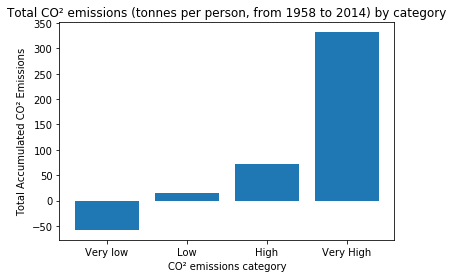

In [767]:
# Creating a bar plot to see the Balance of CO² Emissions
locations_CO2 = [1, 2, 3, 4]
heights_CO2 = [very_low_sum_CO2, low_sum_CO2, high_sum_CO2, very_high_sum_CO2]
labels_CO2 = ['Very low', 'Low', 'High', 'Very High']
plt.bar(locations_CO2, heights_CO2, tick_label=labels_CO2)
plt.title('Total CO² emissions (tonnes per person, from 1958 to 2014) by category')
plt.xlabel('CO² emissions category')
plt.ylabel('Total Accumulated CO² Emissions');

In [768]:
# Calculating the CO² Balance of the 190 countries from 1958 to 2014 
int(heights_CO2[0] + heights_CO2[1] + heights_CO2[2] + heights_CO2[3])

360

In [769]:
# Counting the number of countries on each Green Economy Index
df_CO2_GDP_8 = df_CO2_GDP.query('green_economy_index == "8"').country.nunique()
df_CO2_GDP_7 = df_CO2_GDP.query('green_economy_index == "7"').country.nunique()
df_CO2_GDP_6 = df_CO2_GDP.query('green_economy_index == "6"').country.nunique()
df_CO2_GDP_5 = df_CO2_GDP.query('green_economy_index == "5"').country.nunique()
df_CO2_GDP_4 = df_CO2_GDP.query('green_economy_index == "4"').country.nunique()
df_CO2_GDP_3 = df_CO2_GDP.query('green_economy_index == "3"').country.nunique()

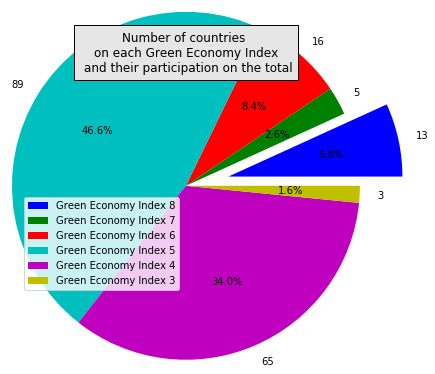

In [770]:
# Creating a pie plot with the number of countries on each Green Economy Index
pie_labels = ['Green Economy Index 8', 'Green Economy Index 7', 'Green Economy Index 6', 'Green Economy Index 5', \
              'Green Economy Index 4', 'Green Economy Index 3']
colors = ['b', 'g', 'r', 'c', 'm', 'y']
tuple_values = df_CO2_GDP_8, df_CO2_GDP_7, df_CO2_GDP_6, df_CO2_GDP_5, df_CO2_GDP_4, df_CO2_GDP_3
pie_values = list(tuple_values)
plt.axis("equal")
plt.pie(pie_values, colors=colors, radius=2, autopct='%0.1f%%', explode=[0.5, 0, 0, 0, 0, 0], labels=tuple_values)
plt.title('Number of countries \non each Green Economy Index\n and their participation on the total', \
          bbox={'facecolor':'0.9', 'pad':6})
plt.legend(pie_labels,loc=3)
plt.show()

### Is there any relatonship between CO² emissions, GDP, Exports, Agricultural land size and Population density?

**3.6.** To be able to create a correlation matrix I merged all the 5 dataframes created on **Section 2.6**

In [771]:
# As Population has the higher number of countries (195), it is going to be the base of the merge 
# for all the other dataframes. I merged all the dataframes at once using Python's functools.reduce()

# Importing reduce function from functools module
from functools import reduce

# First, I created a list with all the dataframes that I want to merge
df_correl_list = [df_correl_pop, df_correl_CO2, df_correl_GDP, df_correl_agri, df_correl_expo]

# Then I used reduce() and a lambda function to iterate over and merge each dataframe on the list
df_correl_final = reduce(lambda left,right: pd.merge(left,right,on='country'), df_correl_list)

In [772]:
# Showing the row with Null value, if there is any 
df_correl_final[df_correl_final.isna().any(axis=1)]

,country,population_density,CO2,GDP,agric_land_size,exports_GDP_perc
53,Eritrea,47.0,0.147,1200,75.20,NaN
129,Papua New Guinea,17.1,0.815,2620,2.63,NaN
161,Syria,105.0,1.600,4300,75.80,NaN
170,Turkmenistan,11.6,12.500,14300,72.00,NaN


In [773]:
# Removing Null values from the final dataframe
df_correl_final = df_correl_final[df_correl_final.exports_GDP_perc.notnull()]

In [774]:
# Creating the correlation matrix
corr = df_correl_final.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

,population_density,CO2,GDP,agric_land_size,exports_GDP_perc
population_density,1,0.116559,0.2626,-0.104163,0.45364
CO2,0.116559,1,0.853243,-0.265577,0.418564
GDP,0.2626,0.853243,1,-0.274506,0.570828
agric_land_size,-0.104163,-0.265577,-0.274506,1,-0.21975
exports_GDP_perc,0.45364,0.418564,0.570828,-0.21975,1


<a id='conclusions'></a>

## Conclusions

**Here are the conclusions of the analysis:**

1. As explained on the Introduction, the best `green_economy_index` are those with the combination of **very_low** `CO2_class` and **very_high** `GDP_class`, and represent the **countries with the less usage of fossil fuels on their gross domestic production**.

2. Out of 190 countries on the dataset available, there are **13 countries** with the **Top Green Economy Index (8)**. 

3. 12 of those 13 are European countries, the only exception is United Arab Emirates.

4. Those **13 countries with the top Green Economy Index (8)** represent **6,8% of the total 190 countries** on the dataset.

5. The **Total Balance** from the 190 countries was **360 tonnes of CO² per person**, between 1958 and 2014. 

6. The 'very low' countries counterbalances the effect of the 'low' and most part of the 'high' CO² emission countries, but we still have a large contribution of the 'very high' countries, which hold the large positive balance at the end.

7. Based on 2014 data, CO² emissions are highly correlated with GDP per capita (0.85) and have a medium correlation with Exportation - \% of GDP (0.41)

**Limitations of the analysis:**

CO2 emissions dataset considers only fossil fuel emissions, it does not take into consideration the other sources of dioxide emissions like livestock, deforestation and electricity production.